# Introduction - Hashtables

In [31]:
import numpy as np
from lolviz import *

n = 5_000_000
data = list(np.random.randint(low=0,high=1_000_000,size=n))
data[0:10]

[493498,
 460297,
 283452,
 850447,
 999548,
 256797,
 739679,
 839439,
 945499,
 475504]

## Linear Search

In [32]:
def linear_search(data, x):
    for item in data:
        if item == x:
            return True
        
    return False

### Search for one integer

In [33]:
x = %time linear_search(data, 999)

CPU times: user 67.3 ms, sys: 2.3 ms, total: 69.6 ms
Wall time: 68.6 ms


### Search for multiple integers

In [34]:
%time for x in range(50): linear_search(data, x)

CPU times: user 5.83 s, sys: 28.9 ms, total: 5.86 s
Wall time: 5.86 s


### Hashtables and Hashsearch Implementation

How would you like to generate the hashcode?

In [ ]:
# put x into one of 10 possible buckets

def hash(x): 
    return x % 10

[(d,hash(d)) for d in data[0:10]]

Most important - Create the hashtable

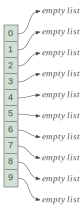

In [36]:
buckets = [[] for i in range(10)]
objviz(buckets)

In [37]:
for d in data[0:10]:
    buckets[hash(d)].append(d)
buckets

[[],
 [],
 [283452],
 [],
 [475504],
 [],
 [],
 [460297, 850447, 256797],
 [493498, 999548],
 [739679, 839439, 945499]]

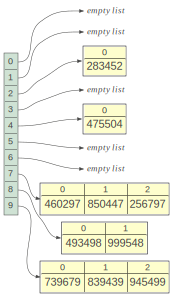

In [38]:
objviz(buckets)

Perform linear search inside the bucket.

## Combined Process

In [39]:
def hash_code(x):
    return x % 10  # put x into one of 10 possible buckets


def hash_table(data):
    buckets = [[] for i in range(10)]  # create 10 empty buckets
    for d in data:
        buckets[hash_code(d)].append(d)  # partition the integers into 10 buckets based on its hashcode
    return buckets


def hash_search(buckets, x):
    i = hash_code(x)
    for a in buckets[i]:
        if a == x:
            return True
    return False

### STEP 1: create buckets from the data

In [40]:
buckets = hash_table(data)  # STEP 1: create buckets from the data

### STEP 2: perform hash search for one integer

In [41]:
%time hash_search(buckets, 999)  # STEP 2: perform hash search for one integer

CPU times: user 3.21 ms, sys: 617 µs, total: 3.82 ms
Wall time: 3.88 ms


True

### STEP 3: perform hash search for multiple integers

In [42]:
%time for x in range(50): hash_search(buckets, x) # STEP 3: perform hash search for multiple integers

CPU times: user 591 ms, sys: 20.1 ms, total: 611 ms
Wall time: 610 ms


### Multiple Integers Search Time
#### Linear Search: 5.86 s (5860 ms)
#### After Implementing Hashtables: 610 ms

-------

### Appendix: Strings

In [43]:
states = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", 
               "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", 
               "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", 
               "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", 
               "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", 
               "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", 
               "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", 
               "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

Unicode of the 1st character and the "modulo".

In [44]:
def hash(s):
    return ord(s[0])

def htable(A):
    buckets = [[] for i in range(10)]
    for a in A:
        # fit in 10 buckets
        b = hash(a) % 10
        buckets[b].append(a)
    return buckets

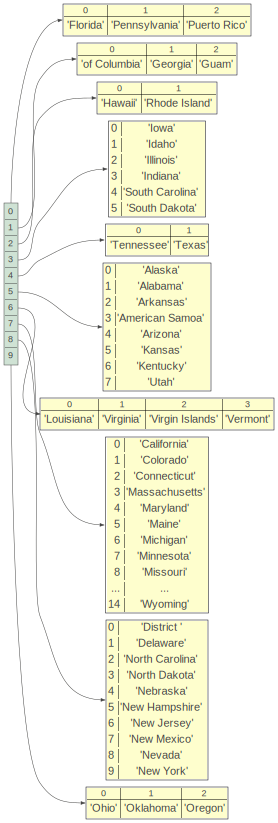

In [45]:
buckets = htable(states)
objviz(buckets)

# Summary